In [1]:
import numpy as np
import matplotlib.pyplot as plt

import nbimporter
import water_liquid
import van_genuchten as vG

Importing Jupyter notebook from water_liquid.ipynb
Importing Jupyter notebook from moisture.ipynb
Importing Jupyter notebook from moisture_conversion.ipynb
Importing Jupyter notebook from vapour_pressure.ipynb
Importing Jupyter notebook from property_conversion.ipynb
Importing Jupyter notebook from van_genuchten.ipynb


### Bentheimer Sandstoneの物性値  
参考：V.Voronina, L. Pel and K. Kopinga: The influence of osmotic pressure on poulticing treatments for heritage objects, Material and Structures, vol.46, pp221-231, 2013  


## Functions

#### van-Genuchten用情報

In [2]:
def vG_info():
    return {
        'Alfa'   : 10.0/98.0,
        'n'      : 2.0,
        'm'      : 1.0 - ( 1.0 / 2.0 ),
        'l'      : 0.5,
    }

In [3]:
vG_info()['Alfa']

0.10204081632653061

### 材料の熱物性値

$\psi$：空隙率(porosity)[-]  

In [4]:
def psi():
    return 0.23

$\rho$：材料の密度(density)[kg/m3]

In [5]:
def row():
    return 1479.25

$C$：材料の比熱(specific heat)[J/(kg・K)]  

In [6]:
def C():
    return 750.0

#### 材料実質部の熱容量 $c\rho$

In [7]:
def getCRow( water ):
    return C() * row()

### 材料の水分特性

#### 含水率 $\phi$

In [8]:
def getPhi( water ):
    return vG.getPhi( psi(), vG_info()['Alfa'], water.miu, vG_info()['m'], vG_info()['n'] )

#### 含水率の水分化学ポテンシャル微分 $\frac{\partial \phi}{\partial \mu}$

In [9]:
def getDPhi( water ):
    return vG.getDPhi( psi(), vG_info()['Alfa'], water.miu, vG_info()['m'], vG_info()['n'] )

#### 含水率から液水の水分化学ポテンシャル $\mu$

In [10]:
def getMiuByPhi( water ):
    return vG.getMiu( psi(), water.phi, vG_info()['Alfa'], vG_info()['m'], vG_info()['n'] )

### 熱・水分の移動係数

$K_{sat}$：飽和透水係数(liquid permeability)[m2/s]  

In [11]:
def Ksat():
    return 2.0e-7

$\delta_p$：絶乾時の透湿率(moisture permeability)[kg/m Pa s]

In [12]:
def DP():
    return 2.0E-10

#### 熱伝導率 $\lambda$

In [13]:
def getLAM( water ):
    return 1.2

#### 透水係数 $D_w$

In [14]:
def getDw( water ):
    return Ksat() * vG.getKl( vG_info()['Alfa'], water.miu, vG_info()['m'], vG_info()['n'], vG_info()['l'] )

#### 透湿率（湿気伝導率） $D_p$

In [15]:
def getDP( water ):
    Sl  = water.phi / psi()
    return DP() * ( 1.0 - Sl * 0.9 )

### Example

In [16]:
c = water_liquid.MiuBasedWater( temp = 293.15, miu = -10.0, material_name = 'BentheimerSandstone')

In [17]:
getCRow( c )

1109437.5

In [18]:
getLAM( c )

1.2

In [19]:
getPhi( c )

0.16098357394272111

In [20]:
getMiuByPhi( c )

Importing Jupyter notebook from bentheimer_sandstone.ipynb


-10.000000000000002

In [21]:
getDw( c )

1.3666027427457417e-08

In [22]:
getDP( c )

7.401285517526175e-11

In [23]:
getDPhi( c )

0.008211771778347334

NameError: name 'HydrothermalInfo' is not defined

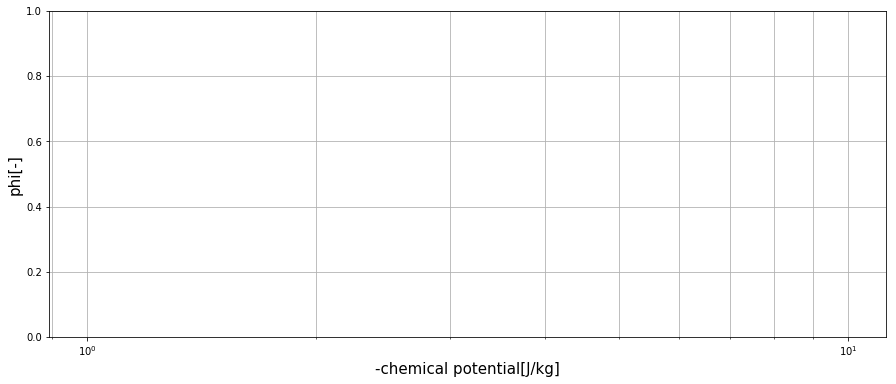

In [24]:
#######################################
###     物性値の確認     ###
###     グラフの描画      ###
plt.figure(figsize = (15.0, 6))
plt.xscale("log")
#plt.yscale("log")
plt.grid(which="both")
plt.xlabel("-chemical potential[J/kg]", fontsize = 15)
plt.ylabel("phi[-]", fontsize = 15)

b = [ HydrothermalInfo() for i in range(10000)] 
[ b[i].miu( -i ) for i in range (10000) ]
[ b[i].temp( 293.15 ) for i in range (10000) ]
miu = [ -b[i].miu for i in range(10000) ]
phi = [ getPhi( b[i] ) for i in range (10000) ]
plt.plot( miu, phi )
plt.show()
###########################